In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [16]:
file = "./DEA_results_OU.tsv"
df_dea = pd.read_csv(file, sep="\t")
df_dea = df_dea.sort_values(by='gene')
df_dea.reset_index()

,index,gene,log2FC,p_value,q_value,signif
0,52,1,1.394765,8.870428e-14,1.663076e-13,True
1,73,2,1.511409,3.073178e-11,4.152943e-11,True
2,86,3,1.305932,1.119732e-09,1.287048e-09,True
3,96,4,1.016483,2.663563e-07,2.745941e-07,True
4,90,5,1.103783,4.315141e-09,4.741913e-09,True
5,49,6,1.843513,4.370014e-14,8.740028e-14,True
6,22,7,1.550422,4.202157e-17,1.827025e-16,True
7,60,8,1.680408,3.563209e-13,5.841326e-13,True
8,79,9,1.564958,1.376771e-10,1.720964e-10,True
9,25,10,2.592164,8.495834e-17,3.205548e-16,True


In [17]:
file = "./DEA_results_BM.tsv"
df_dea_BM = pd.read_csv(file, sep="\t")
df_dea_BM = df_dea_BM.sort_values(by='gene')
df_dea_BM.reset_index()

,index,gene,log2FC,p_value,q_value,signif
0,21,1,0.639172,4.583718e-03,1.065981e-02,True
1,50,2,0.138046,9.480978e-01,9.597644e-01,False
2,25,3,0.614026,1.861205e-02,3.511708e-02,True
3,58,4,-0.195675,4.830492e-01,5.750586e-01,False
4,70,5,-0.418325,3.274953e-02,5.550768e-02,False
5,95,6,-1.382283,2.686968e-06,1.791312e-05,True
6,71,7,-0.797344,2.710512e-02,4.755284e-02,True
7,3,8,1.800040,5.500859e-12,1.375215e-10,True
8,5,9,1.774854,1.747090e-09,2.911816e-08,True
9,75,10,-0.867779,1.331370e-02,2.662741e-02,True


In [5]:
# EGX result
file = "./EGX_readcounts_OU_long.csv"
df_egx = pd.read_csv(file)
df_egx["ou2_theta"] = df_egx["ou2_theta"].apply(lambda x: max(x, 0.1)) # replace negative thetas
df_egx

,gene,ou1_conv,ou1_theta,ou1_alpha,ou1_sigma_sq,ou1_gamma,ou1_loglik,ou2_conv,ou2_theta,ou2_alpha,ou2_sigma_sq,ou2_gamma,ou2_loglik,brown_conv,brown_theta,brown_sigma_sq,brown_gamma,brown_loglik,ou2_vs_bm_pvalue,ou2_vs_ou1_pvalue,qvalue,adaptive
0,1,1,8.148148,1.814060e-02,1.193818,3.997840,-535.555862,1,6.867325e+00,6.531011e-02,2.098637,1.627050,-530.500604,1,8.165784,0.830309,6.860399,-535.897025,4.532778e-03,1.018934e-03,4.532778e-03,True
1,1,1,8.148148,1.814060e-02,1.193818,3.997840,-535.555862,1,1.671321e+01,6.531011e-02,2.098637,1.627050,-530.500604,1,8.165784,0.830309,6.860399,-535.897025,4.532778e-03,1.018934e-03,4.532778e-03,True
2,2,1,7.462046,1.174623e-10,0.783213,8.494916,-541.079997,1,6.306752e+00,6.852712e-03,0.785107,8.673397,-538.504426,1,7.462046,0.783213,8.494916,-541.079997,7.611032e-02,2.323108e-02,7.611032e-02,False
3,2,1,7.462046,1.174623e-10,0.783213,8.494916,-541.079997,1,5.466432e+01,6.852712e-03,0.785107,8.673397,-538.504426,1,7.462046,0.783213,8.494916,-541.079997,7.611032e-02,2.323108e-02,7.611032e-02,False
4,3,1,7.047138,1.082483e-02,0.820268,7.958165,-535.948008,1,6.209524e+00,3.730177e-02,1.181401,5.010661,-533.675321,1,7.047874,0.663384,10.417879,-536.054952,9.258479e-02,2.914106e-02,9.258479e-02,False
5,3,1,7.047138,1.082483e-02,0.820268,7.958165,-535.948008,1,1.539483e+01,3.730177e-02,1.181401,5.010661,-533.675321,1,7.047874,0.663384,10.417879,-536.054952,9.258479e-02,2.914106e-02,9.258479e-02,False
6,4,1,7.730857,1.174623e-10,0.673738,13.901783,-554.401443,1,6.634392e+00,5.594656e-03,0.641634,15.032827,-551.680486,1,7.730857,0.673738,13.901784,-554.401443,6.581176e-02,1.965912e-02,6.581176e-02,False
7,4,1,7.730857,1.174623e-10,0.673738,13.901783,-554.401443,1,6.179929e+01,5.594656e-03,0.641634,15.032827,-551.680486,1,7.730857,0.673738,13.901784,-554.401443,6.581176e-02,1.965912e-02,6.581176e-02,False
8,5,1,7.477517,4.841706e-10,0.585451,15.716389,-548.345071,1,6.513875e+00,1.734120e-09,0.509773,18.719745,-546.108500,1,7.477517,0.585450,15.716454,-548.345071,1.068242e-01,3.443161e-02,1.068242e-01,False
9,5,1,7.477517,4.841706e-10,0.585451,15.716389,-548.345071,1,1.447278e+08,1.734120e-09,0.509773,18.719745,-546.108500,1,7.477517,0.585450,15.716454,-548.345071,1.068242e-01,3.443161e-02,1.068242e-01,False


In [6]:
# EGX result
file = "./EGX_readcounts_BM_long.csv"
df_egx_BM = pd.read_csv(file)
df_egx_BM["ou2_theta"] = df_egx_BM["ou2_theta"].apply(lambda x: max(x, 0.1)) # replace negative thetas
df_egx_BM

,gene,ou1_conv,ou1_theta,ou1_alpha,ou1_sigma_sq,ou1_gamma,ou1_loglik,ou2_conv,ou2_theta,ou2_alpha,ou2_sigma_sq,ou2_gamma,ou2_loglik,brown_conv,brown_theta,brown_sigma_sq,brown_gamma,brown_loglik,ou2_vs_bm_pvalue,ou2_vs_ou1_pvalue,qvalue,adaptive
0,1,1,5.716552,6.154281e-02,1.618087,3.095912e+00,-530.201431,1,5.456388e+00,6.891377e-02,1.754265,2.762953e+00,-529.745629,1,5.752304,0.585902,12.193880,-533.030150,0.037459,0.010377,0.037459,True
1,1,1,5.716552,6.154281e-02,1.618087,3.095912e+00,-530.201431,1,7.485209e+00,6.891377e-02,1.754265,2.762953e+00,-529.745629,1,5.752304,0.585902,12.193880,-533.030150,0.037459,0.010377,0.037459,True
2,2,1,5.915651,1.349246e-10,0.504307,7.788278e+00,-493.876114,1,6.429353e+00,1.226318e-09,0.500599,7.788315e+00,-493.160446,1,5.915651,0.504307,7.788279,-493.876114,0.488865,0.231546,0.488865,False
3,2,1,5.915651,1.349246e-10,0.504307,7.788278e+00,-493.876114,1,1.000000e-01,1.226318e-09,0.500599,7.788315e+00,-493.160446,1,5.915651,0.504307,7.788279,-493.876114,0.488865,0.231546,0.488865,False
4,3,1,5.515116,1.510951e-02,0.685520,9.830082e+00,-527.859185,1,5.603041e+00,1.423084e-02,0.671110,1.010599e+01,-527.834690,1,5.534523,0.477265,15.581378,-527.987001,0.858721,0.581000,0.858721,False
5,3,1,5.515116,1.510951e-02,0.685520,9.830082e+00,-527.859185,1,3.724019e+00,1.423084e-02,0.671110,1.010599e+01,-527.834690,1,5.534523,0.477265,15.581378,-527.987001,0.858721,0.581000,0.858721,False
6,4,1,4.540990,1.349246e-10,0.435304,7.907125e+00,-480.379353,1,4.964337e+00,1.871003e-03,0.438805,7.864521e+00,-479.773812,1,4.540990,0.435302,7.907185,-480.379354,0.545779,0.271118,0.545779,False
7,4,1,4.540990,1.349246e-10,0.435304,7.907125e+00,-480.379353,1,1.000000e-01,1.871003e-03,0.438805,7.864521e+00,-479.773812,1,4.540990,0.435302,7.907185,-480.379354,0.545779,0.271118,0.545779,False
8,5,1,5.320493,3.549588e-02,0.985878,4.785712e+00,-514.913060,1,5.440609e+00,3.744080e-02,1.015227,4.597514e+00,-514.849088,1,5.256139,0.498707,11.843884,-515.700188,0.426945,0.192000,0.426945,False
9,5,1,5.320493,3.549588e-02,0.985878,4.785712e+00,-514.913060,1,4.203868e+00,3.744080e-02,1.015227,4.597514e+00,-514.849088,1,5.256139,0.498707,11.843884,-515.700188,0.426945,0.192000,0.426945,False


In [7]:
# OUP
file = "./OUP_OU_chi-squared.tsv"
df_oup = pd.read_csv(file, sep="\t")
#df_oup["theta0"] = df_oup["theta0"].apply(lambda x: max(x, 1e-1)) # clip small values
#df_oup["1"] = df_oup["1"].apply(lambda x: max(x, 1e-1)) # clip small values
#df_oup["2"] = df_oup["2"].apply(lambda x: max(x, 1e-1)) # clip small values
df_oup

,ID,gene,theta0,1,2,h0,h1,LR,p,q,signif
0,99,100,3.278258,1.670028,14.579940,-975.81030,-992.84360,17.033325,0.000037,0.002087,True
1,72,73,0.547425,-2.013581,13.978007,-613.28656,-630.07710,16.790527,0.000042,0.002087,True
2,96,97,1.151798,-0.654352,12.477987,-545.80176,-560.58840,14.786621,0.000120,0.003489,True
3,13,14,-0.749923,-3.248464,13.700348,-548.28260,-562.79083,14.508240,0.000140,0.003489,True
4,59,60,-0.053582,-2.646056,13.317273,-618.72530,-632.28270,13.557434,0.000231,0.004627,True
5,84,85,5.807102,4.157743,14.887025,-1257.87790,-1270.21350,12.335571,0.000444,0.007407,True
6,31,32,9.256836,8.137219,15.209251,-2192.53220,-2203.68100,11.148682,0.000841,0.010530,True
7,24,25,0.728007,-1.344125,13.370707,-577.72235,-588.86774,11.145386,0.000842,0.010530,True
8,46,47,2.966196,0.823276,13.763597,-880.91780,-890.79407,9.876282,0.001674,0.017002,True
9,71,72,2.349848,0.614816,11.798135,-636.59440,-646.30060,9.706177,0.001836,0.017002,True


In [8]:
# OUP
file = "./OUP_BM_chi-squared.tsv"
df_oup_BM = pd.read_csv(file, sep="\t")
#df_oup_BM["theta0"] = df_oup_BM["theta0"].apply(lambda x: max(x, 1e-1)) # clip small values
#df_oup_BM["1"] = df_oup_BM["1"].apply(lambda x: max(x, 1e-1)) # clip small values
#df_oup_BM["2"] = df_oup_BM["2"].apply(lambda x: max(x, 1e-1)) # clip small values
df_oup_BM

,ID,gene,theta0,1,2,h0,h1,LR,p,q,signif
0,60,61,5.427157,3.258930,18.660685,-1614.464400,-1621.539700,7.075317,0.007815,0.684175,False
1,69,70,4.581400,3.253484,11.902768,-986.507000,-991.298700,4.791687,0.028597,0.684175,False
2,85,86,2.974371,1.626855,10.960412,-876.719240,-881.444700,4.725464,0.029719,0.684175,False
3,27,28,3.385254,4.640019,-3.767806,-642.291140,-646.972100,4.680969,0.030499,0.684175,False
4,63,64,3.248313,4.585419,-3.927209,-479.909270,-484.367250,4.457977,0.034739,0.684175,False
5,88,89,4.861964,6.291705,-2.118084,-1028.597800,-1032.710200,4.112427,0.042569,0.684175,False
6,13,14,4.349609,5.305522,-1.460607,-762.894650,-766.252400,3.357727,0.066890,0.684175,False
7,17,18,5.080758,3.666175,13.229636,-1303.331400,-1306.683600,3.352173,0.067116,0.684175,False
8,31,32,5.203930,6.021127,0.994399,-899.372800,-902.682600,3.309814,0.068867,0.684175,False
9,66,67,-0.797555,-1.756561,3.789202,4.061394,0.796059,3.265335,0.070759,0.684175,False


In [9]:
# DEA
truth = np.array([True]*100 + [False]*100)

ValueError: 'gree' is not a valid value for color: supported inputs are (r, g, b) and (r, g, b, a) 0-1 float tuples; '#rrggbb', '#rrggbbaa', '#rgb', '#rgba' strings; named color strings; string reprs of 0-1 floats for grayscale values; 'C0', 'C1', ... strings for colors of the color cycle; and pairs combining one of the above with an alpha value

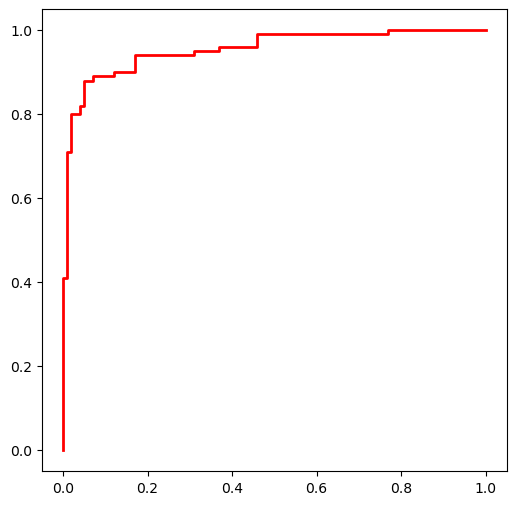

In [26]:
# DEA: Compute ROC curve and AUC
p_dea = np.concatenate((df_dea["p_value"].values, df_dea_BM["p_value"].values))
fpr1, tpr1, _ = roc_curve(~truth, p_dea)
roc_auc1 = auc(fpr1, tpr1)

# EGX: Compute ROC curve and AUC
p_egx = np.concatenate((df_egx["ou2_vs_ou1_pvalue"].iloc[::2].values, df_egx_BM["ou2_vs_ou1_pvalue"].iloc[::2].values))
fpr2, tpr2, _ = roc_curve(~truth, p_egx)
roc_auc2 = auc(fpr2, tpr2)

# EGX: Compute ROC curve and AUC
p_oup = np.concatenate((df_oup["p"].values, df_oup_BM["p"].values))
fpr3, tpr3, _ = roc_curve(~truth, p_oup)
roc_auc3 = auc(fpr3, tpr3)

plt.figure(figsize=(6,6))
plt.plot(fpr3, tpr3, color='red', lw=2, label=f'OUP (AUC = {roc_auc3:.3f})')
plt.plot(fpr2, tpr2, color='green', lw=2, label=f'EGX (AUC = {roc_auc2:.3f})')
plt.plot(fpr1, tpr1, color='skyblue', lw=2, label=f'DEA (AUC = {roc_auc1:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC')
plt.legend(loc="lower right")
plt.grid()
plt.savefig('ROC_p.png')

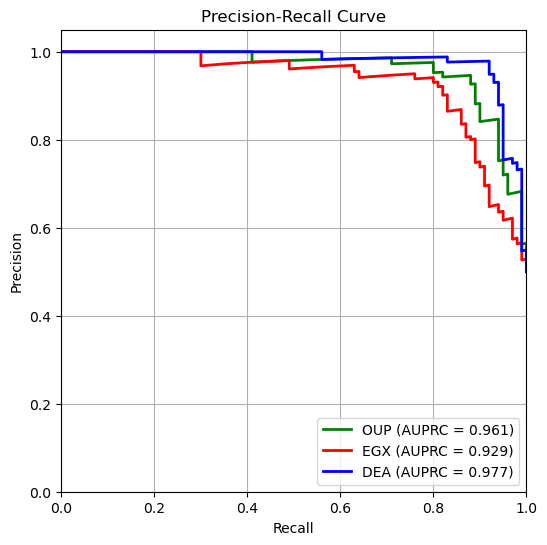

In [21]:
# DEA: Compute Precision-Recall curve and AUC
precision1, recall1, _ = precision_recall_curve(~truth, p_dea)
roc_auc1 = auc(recall1, precision1)

# EGX: Compute Precision-Recall curve and AUC
precision2, recall2, _ = precision_recall_curve(~truth, p_egx)
roc_auc2 = auc(recall2, precision2)

# OUP: Compute Precision-Recall curve and AUC
precision3, recall3, _ = precision_recall_curve(~truth, p_oup)
roc_auc3 = auc(recall3, precision3)

# Plot Precision-Recall curve
plt.figure(figsize=(6, 6))
plt.plot(recall3, precision3, color='green', lw=2, label=f'OUP (AUPRC = {roc_auc3:.3f})')
plt.plot(recall2, precision2, color='red', lw=2, label=f'EGX (AUPRC = {roc_auc2:.3f})')
plt.plot(recall1, precision1, color='blue', lw=2, label=f'DEA (AUPRC = {roc_auc1:.3f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.grid()
plt.savefig('Precision_Recall_p.png')
plt.show()